In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

2025-07-09 16:21:59.441521: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 16:21:59.912270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752049320.062159    1674 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752049320.110465    1674 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752049320.445598    1674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
# Initialize TensorBoard writer
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter(f'runs/linear_regression_{timestamp}')

In [8]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [9]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [10]:
# Convert to torch tensors and add to TensorBoard
inputs_tensor = torch.from_numpy(x_train)
targets_tensor = torch.from_numpy(y_train)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Log model graph and sample data
writer.add_graph(model, inputs_tensor)
writer.add_figure('training_data', plt.figure(figsize=(8, 6)), 0)
plt.scatter(x_train, y_train)
plt.title('Training Data')
plt.close()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

Epoch [5/60], Loss: 0.6866
Epoch [10/60], Loss: 0.3806
Epoch [15/60], Loss: 0.2566
Epoch [20/60], Loss: 0.2064
Epoch [25/60], Loss: 0.1860
Epoch [30/60], Loss: 0.1778
Epoch [35/60], Loss: 0.1745
Epoch [40/60], Loss: 0.1731
Epoch [45/60], Loss: 0.1725
Epoch [50/60], Loss: 0.1723
Epoch [55/60], Loss: 0.1722
Epoch [60/60], Loss: 0.1722


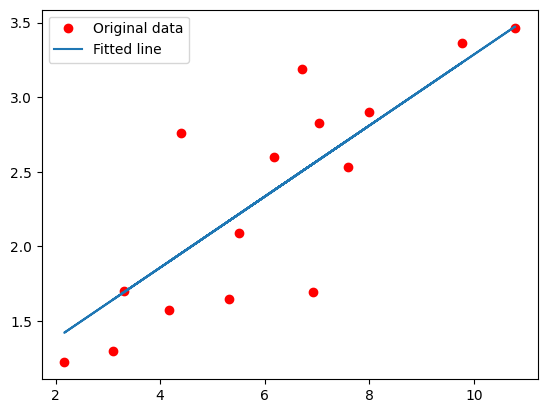

In [11]:
# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs_tensor)
    loss = criterion(outputs, targets_tensor)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Add scalar summaries for loss
    writer.add_scalar('training_loss', loss.item(), epoch)
    
    # Add histograms for weights and gradients
    for name, param in model.named_parameters():
        writer.add_histogram(name, param, epoch)
        writer.add_histogram(f'{name}.grad', param.grad, epoch)
    
    # Add sample predictions every 10 epochs
    if epoch % 10 == 0:
        predicted = model(inputs_tensor).detach().numpy()
        fig = plt.figure(figsize=(8, 6))
        plt.plot(x_train, y_train, 'ro', label='Original data')
        plt.plot(x_train, predicted, label='Fitted line')
        plt.legend()
        plt.title(f'Epoch {epoch}')
        writer.add_figure('predictions', fig, epoch)
        plt.close()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the final graph
predicted = model(inputs_tensor).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

# Close the writer
writer.close()